In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
radius_upper = 0.7
radius_lower = 0.7
start = np.asarray([0, 0], dtype=np.float32)
radius = np.linspace(radius_upper, radius_lower, num=30)
angle = np.radians(np.linspace(0, 360, num=30))

In [39]:
x_vector = start[0] + radius * np.cos(angle)
y_vector = start[1] + radius * np.sin(angle)
circle_coordinates = np.column_stack([x_vector, y_vector])

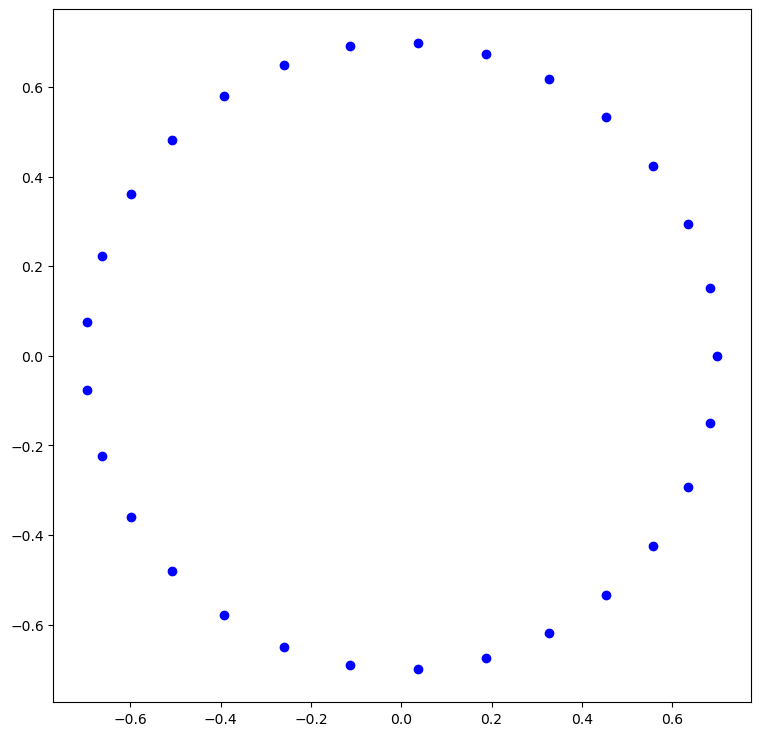

In [40]:
plt.figure(figsize=(9, 9))
plt.scatter(circle_coordinates[:, 0][1:], circle_coordinates[:, 1][1:], color='blue', marker='o', label='first')

In [27]:
radius_upper = 0.7
radius_lower = 0
radius2 = np.linspace(radius_upper, radius_lower, num=30)

In [28]:
x_vector2 = start[0] + radius2 * np.cos(angle)
y_vector2 = start[1] + radius2 * np.sin(angle)

spiral_coordinates = np.column_stack([x_vector2, y_vector2])

In [29]:
x_vector2 = start[0] + radius * np.sin(angle)
y_vector2 = start[1] + radius * np.cos(angle)
spiral_coordinates2 = np.column_stack([x_vector2, y_vector2])
spiral_coordinates2 = spiral_coordinates2[::-1]

In [30]:
x_vector2 = start[0] + radius * np.sin(np.flipud(angle))
y_vector2 = start[1] + radius * np.cos(np.flipud(angle))
spiral_coordinates3 = np.column_stack([x_vector2, y_vector2])

In [34]:
x_vector2 = start[0] + radius * np.cos(np.flipud(angle))
y_vector2 = start[1] + radius * np.sin(np.flipud(angle))
spiral_coordinates4 = np.column_stack([x_vector2, y_vector2])[::-1]

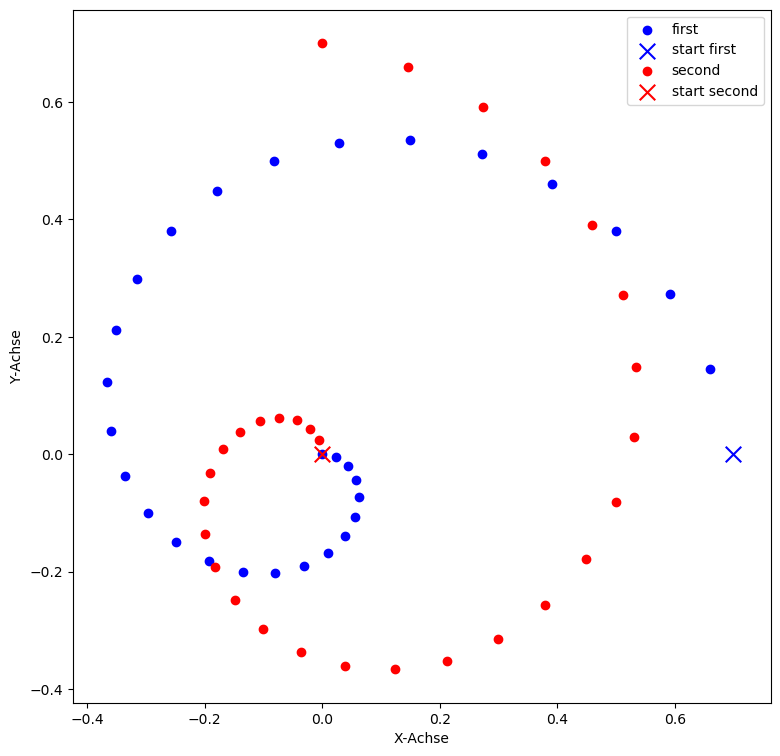

In [35]:
plt.figure(figsize=(9, 9))
plt.scatter(spiral_coordinates[:, 0][1:], spiral_coordinates[:, 1][1:], color='blue', marker='o', label='first')
plt.scatter(spiral_coordinates[:, 0][0], spiral_coordinates[:, 1][0], color='blue', marker='x', s=125,
            label='start first')

plt.scatter(spiral_coordinates2[:, 0][1:], spiral_coordinates2[:, 1][1:], color='red', marker='o', label='second')
plt.scatter(spiral_coordinates2[:, 0][0], spiral_coordinates2[:, 1][0], color='red', marker='x', s=125,
            label='start second')

plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

plt.legend()

plt.show()

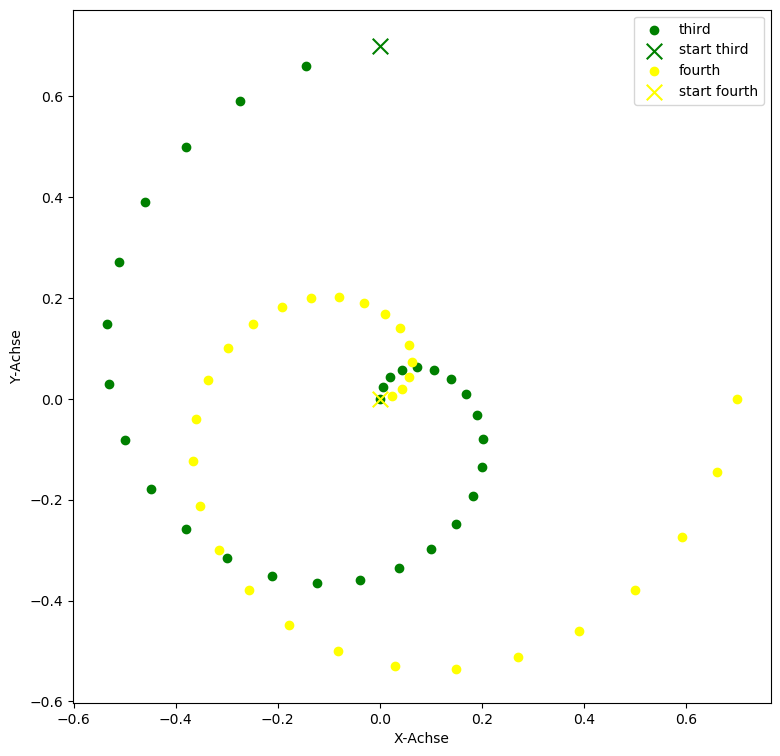

In [36]:
plt.figure(figsize=(9, 9))

plt.scatter(spiral_coordinates3[:, 0][1:], spiral_coordinates3[:, 1][1:], color='green', marker='o', label='third')
plt.scatter(spiral_coordinates3[:, 0][0], spiral_coordinates3[:, 1][0], color='green', marker='x', s=125,
            label='start third')

plt.scatter(spiral_coordinates4[:, 0][1:], spiral_coordinates4[:, 1][1:], color='yellow', marker='o', label='fourth')
plt.scatter(spiral_coordinates4[:, 0][0], spiral_coordinates4[:, 1][0], color='yellow', marker='x', s=125,
            label='start fourth')

plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')

plt.legend()

plt.show()

# Folding Motion

In [35]:
radius_lower = 0.1
radius_upper = 0.9
x_start, y_start = [0, 0]
line_start = x_start + radius_upper * np.cos(0)
line = np.linspace([x_start, line_start], [x_start, y_start], num=10)

# Circle
theta = np.linspace(0, 2 * np.pi, 100)
radius = 1
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)

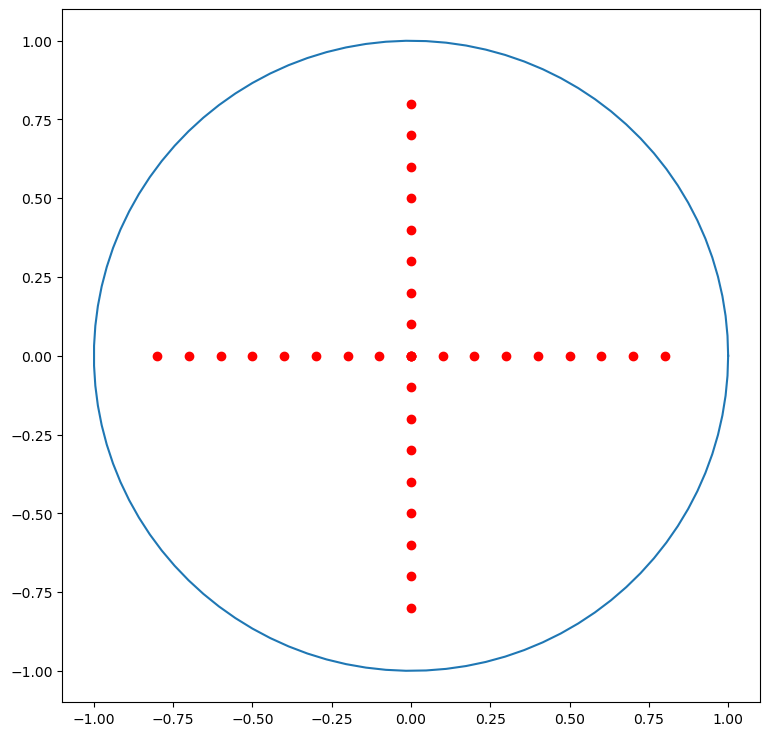

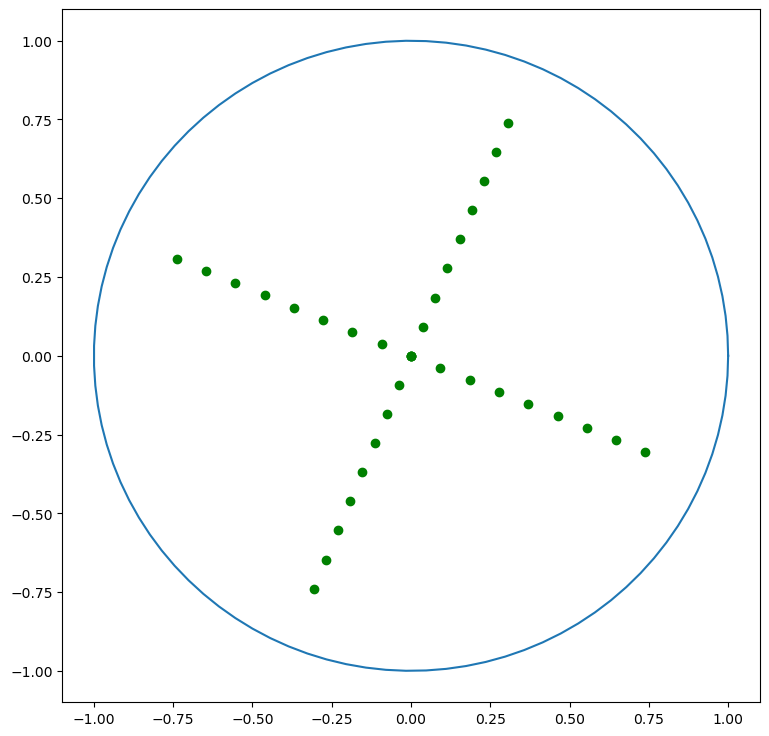

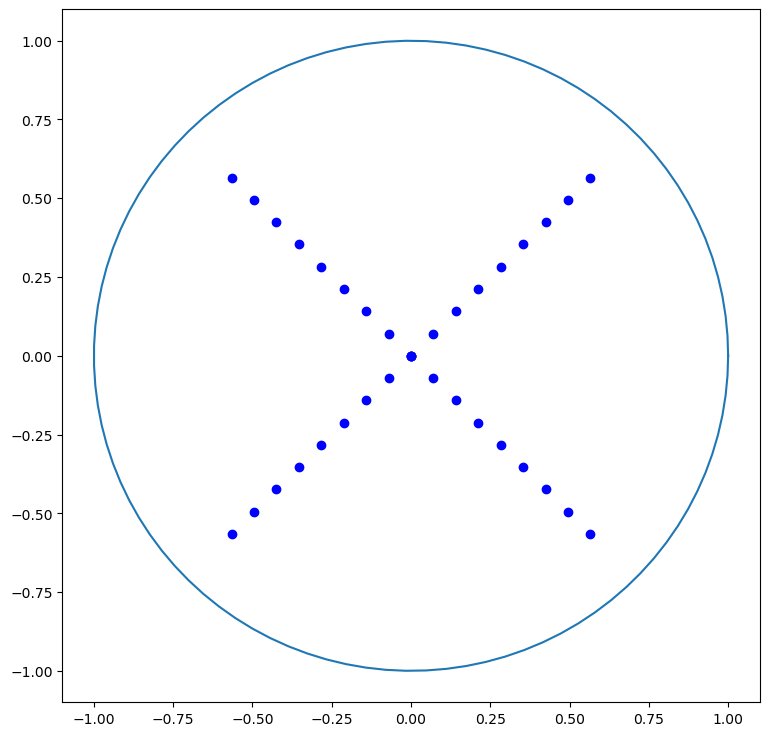

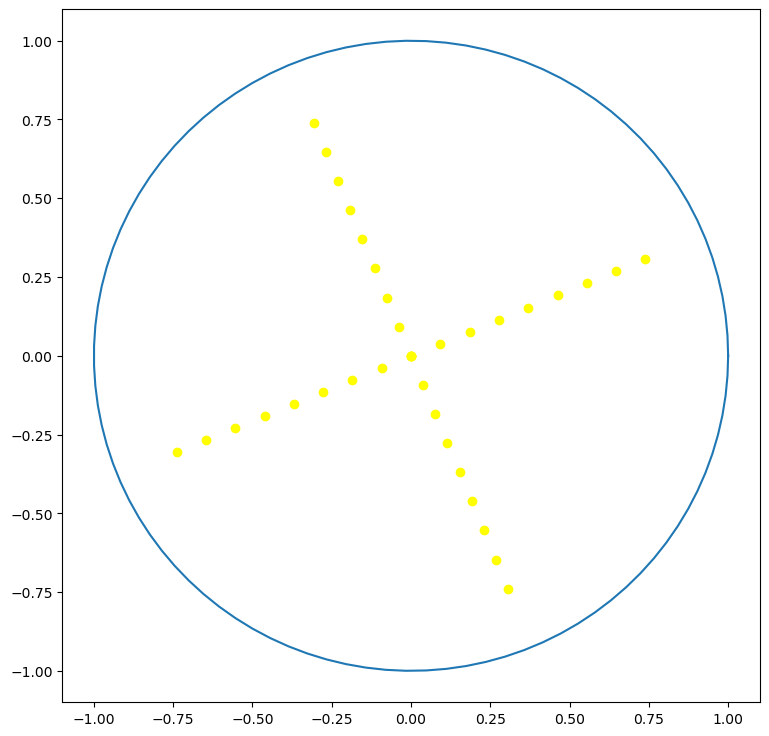

In [36]:
colors = ["red", "green", "blue", "yellow"]
for x in range(4):
    radian_shift1 = np.radians(22.5)
    radian_shift2 = np.radians(90.0)

    rotation_matrix = np.array([[np.cos(radian_shift1), -np.sin(radian_shift1)],
                                [np.sin(radian_shift1), np.cos(radian_shift1)]])

    rotation_matrix2 = np.array([[np.cos(radian_shift2), -np.sin(radian_shift2)],
                                 [np.sin(radian_shift2), np.cos(radian_shift2)]])

    line2 = line @ rotation_matrix2
    line3 = line2 @ rotation_matrix2
    line4 = line3 @ rotation_matrix2

    plt.figure(figsize=(9, 9))
    plt.plot(x_circle, y_circle)
    plt.scatter(line[:, 0][1:], line[:, 1][1:], color=colors[x], marker='o')
    plt.scatter(line2[:, 0][1:], line2[:, 1][1:], color=colors[x], marker='o')
    plt.scatter(line3[:, 0][1:], line3[:, 1][1:], color=colors[x], marker='o')
    plt.scatter(line4[:, 0][1:], line4[:, 1][1:], color=colors[x], marker='o')

    line = line @ rotation_matrix

# HorizontalEllipticalMotion

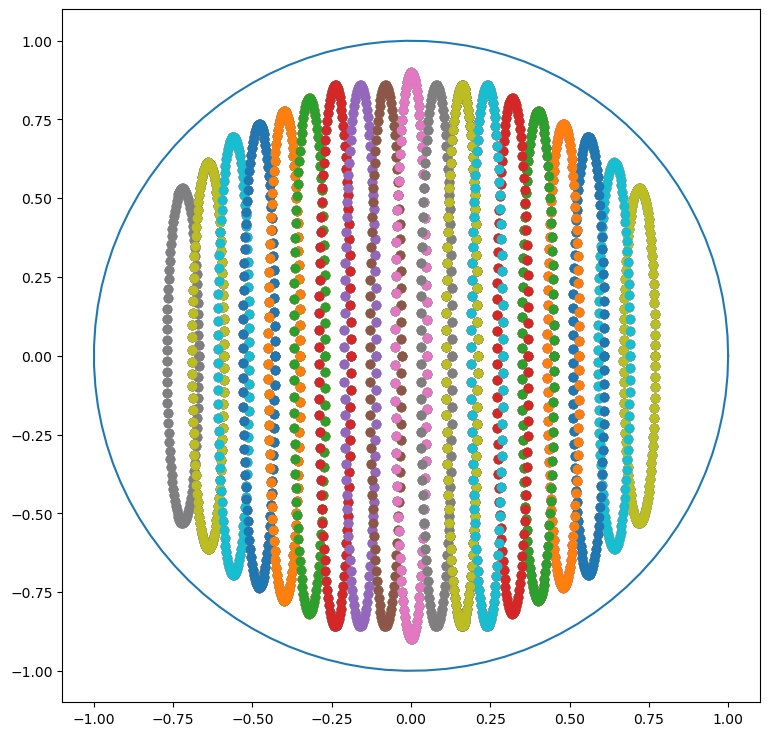

In [40]:
x_start, y_start = [0, 0]
horizontal_increment = 0.08
radius_upper = 0.9

semi_major_x = 0.05
semi_major_y = np.linspace(radius_upper, radius_upper / 2, num=12)


theta = np.linspace(0, 2 * np.pi, 100)
radius = 1
x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)


x = x_start + semi_major_x * np.cos(theta)
increment_x = True
ellipses = []
plt.figure(figsize=(9, 9))
for i in range(100):
    for y_radius in semi_major_y:
        y = y_start + y_radius * np.sin(theta)
        coordinates = np.column_stack([x, y])
        inside_circle = np.linalg.norm(coordinates - np.array([0, 0]),
                                                       axis=1) < radius_upper
        if np.all(inside_circle):
            plt.scatter(coordinates[:,0], coordinates[:, 1])
            break
    if increment_x:
        x += horizontal_increment
        if np.all(np.linalg.norm([x - x_start], axis=0) > radius_upper):
            increment_x = False
    else:
        x -= horizontal_increment
        if np.all(np.linalg.norm([x - x_start], axis=0) > radius_upper):
            increment_x = True



plt.plot(x_circle, y_circle)
plt.show()